In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [10]:
redwine = pd.read_csv("/content/data/winequality-red.csv")
redwine.shape # (rows, columns)

(1599, 12)

In [5]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
redwine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
redwine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5
1271,7.3,0.44,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.7,6
274,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
862,7.5,0.42,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5
1095,9.4,0.40,0.47,2.5,0.087,6.0,20.0,0.99772,3.15,0.50,10.5,5
930,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
1375,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,5
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5
92,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5


In [6]:
X = redwine.drop("quality", axis =1)
y = redwine["quality"]

In [7]:
redwine.shape

(1599, 12)

In [8]:
redwine.quality
# indicates how reliable a dataset is

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
redwine.dtypes
# showing the type of data represented in each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# prints the number of columns, column labels, column data types, memory usage and shows nan values
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
redwine.describe()
# this calcultes the percentile, std, mean and min

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
redwine.shape

(1599, 12)

In [13]:
redwine1 = redwine.drop_duplicates()
redwine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
redwine1.shape

(1359, 12)

In [15]:
redwine1.isnull().sum()
#  returns the number of missing values in the dataset.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
redwine1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

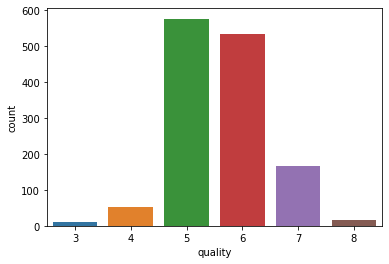

In [17]:
sns.countplot(data = redwine1, x  = 'quality')

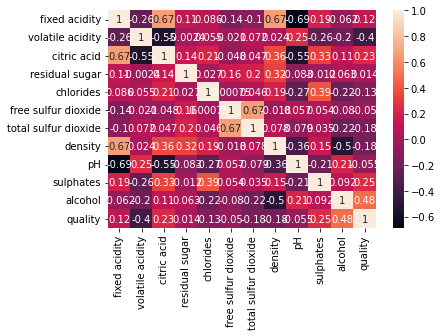

In [18]:
sns.heatmap(data= redwine1.corr(), annot = True)
plt.show()

In [19]:
X = redwine1.drop("quality", axis =1)
y = redwine1["quality"]

In [20]:
# applying standard scaler
scaler = StandardScaler()
scaler.fit(X)
new_scale = scaler.transform(X)

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [22]:
X_train.shape, y_train.shape

((1087, 11), (1087,))

In [23]:
y_test

55      5
1291    6
1544    7
593     5
1261    4
       ..
1086    7
662     6
279     7
1111    7
737     6
Name: quality, Length: 272, dtype: int64

In [24]:
X_test.shape,y_test.shape

((272, 11), (272,))

Applying models before sampling

In [25]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [28]:
sv_pred = sv.predict(X_test)
sv_pred

array([6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 6])

In [29]:
lr_pred = lr.predict(X_test)

In [30]:
lr_pred.shape

(272,)

In [31]:
knn_pred = knn.predict(X_test)

In [32]:
print("Train Accuracy of Logistic Regression",lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(X_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression 57.405703771849126
Accuracy (Test) score of Logistic Regression 58.82352941176471
Accuracy (Test) score of Logistic Regression 58.82352941176471


In [33]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of KNN",knn.score(X_train, y_train)*100)
print("Accuracy (Test) score of KNN", knn.score(X_test, y_test)*100)
print("Accuracy (Test) score of KNN", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 64.0294388224471
Accuracy (Test) score of KNN 47.05882352941176
Accuracy (Test) score of KNN 47.05882352941176


In [34]:
print("Train Accuracy of SVM",sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test, y_test)*100)
print("Accuracy (Test) score of SVM", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of SVM 50.41398344066237
Accuracy (Test) score of SVM 48.161764705882355
Accuracy (Test) score of SVM 47.05882352941176


detecting multicolinery with vif

In [35]:
import pandas as pd
#def calc_vif(X):

 # calculating VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(new_scale,i) for i in range(new_scale.shape[1])]
vif["feature"] = X.columns
print(vif)

         VIF               feature
0   7.880951         fixed acidity
1   1.777884      volatile acidity
2   3.124679           citric acid
3   1.641987        residual sugar
4   1.530769             chlorides
5   1.950922   free sulfur dioxide
6   2.216688  total sulfur dioxide
7   6.281009               density
8   3.397407                    pH
9   1.466779             sulphates
10  3.140944               alcohol


In [36]:
newX = X.drop(['fixed acidity','density'], axis=1)
newX

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
5,0.660,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
1594,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2
1597,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


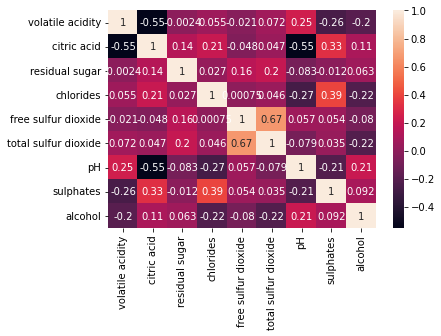

In [37]:
sns.heatmap(data= newX.corr(), annot = True)
plt.show()

In [38]:
newX.shape

(1359, 9)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(newX)
new_scale2= scaler.transform(newX)

In [40]:
new_scale2.shape

(1359, 9)

In [41]:
# undersampling
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(new_scale2, y)
print('new_scale2:', Counter(y))
print('newredwine', Counter(y_rus))

new_scale2: Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})
newredwine Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [42]:

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(new_scale2, y)

print('new_scale2', Counter(y))
print('newredwine', Counter(y_ros))

new_scale2 Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})
newredwine Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})


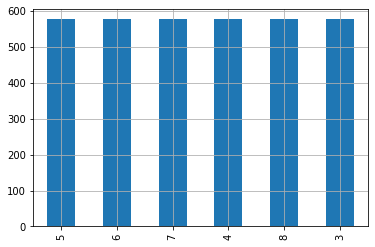

In [43]:
pd.Series(y_ros). value_counts().plot.bar()
plt.grid()

Test Train Split

In [44]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rus, y_rus, test_size=0.2,random_state=42)

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ros, y_ros, test_size=0.2,random_state=42)

In [45]:
X_train1.shape, y_train1.shape

((48, 9), (48,))

In [46]:
X_test1.shape,y_test1.shape

((12, 9), (12,))

In [47]:
X_train2.shape, y_train2.shape

((2769, 9), (2769,))

In [48]:
X_test2.shape,y_test2.shape

((693, 9), (693,))

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train1, y_train1)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [50]:
lr_pred = lr.predict(X_test1)


In [51]:
from sklearn.metrics import accuracy_score
# for under sampling
print("Train Accuracy of Logistic Regression",lr.score(X_train1, y_train1)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(X_test1, y_test1)*100)
#print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test_rus, lr_pred)*100)

Train Accuracy of Logistic Regression 68.75
Accuracy (Test) score of Logistic Regression 25.0


In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train2, y_train2)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [53]:
print("Train Accuracy of Logistic Regression",lr.score(X_train2, y_train2)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(X_test2, y_test2)*100)


Train Accuracy of Logistic Regression 55.03791982665223
Accuracy (Test) score of Logistic Regression 57.57575757575758


In [54]:
cm = confusion_matrix(y_test1,lr_pred)
cm

array([[1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 3, 0]])

In [55]:
lr_pred = lr.predict(X_test2)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
cm2 = confusion_matrix(y_test2,lr_pred)
cm2

array([[122,   0,   0,   0,   0,   0],
       [ 32,  35,  20,   4,   2,   5],
       [ 13,  22,  70,  12,   9,   2],
       [  5,  18,  21,  32,  22,  17],
       [  1,   5,  10,  13,  39,  52],
       [  0,   0,   0,   0,   9, 101]])

In [57]:
lr.fit(X_train2,y_train2)
lr_train_pred = lr.predict(X_train2)
lr_test_pred = lr.predict(X_test2)

precision Matrix for logistic regression


In [58]:
print("macro:", round(precision_score(y_test2, lr_pred, average = 'macro')*100,2))
print(" micro:", round(precision_score(y_test2,lr_pred, average = 'micro')*100,2))
print("weighted:", round(precision_score(y_test2,lr_pred, average = 'weighted')*100,2))

macro: 54.97
 micro: 57.58
weighted: 55.39


Recall score of LR

In [59]:
lr.fit(X_train2,y_train2)
lr_train_pred = lr.predict(X_train2)
lr_test_pred = lr.predict(X_test2)

knn_pred = knn.predict(X_test)

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(recall_score(y_test2, lr_test_pred, average = 'macro')*100,2))
print(" micro:", round(recall_score(y_test2,lr_test_pred, average = 'micro')*100,2))
print("weighted:", round(recall_score(y_test2,lr_test_pred, average = 'weighted')*100,2))

macro: 57.09
 micro: 57.58
weighted: 57.58


F1 score of LR

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(f1_score(y_test2, lr_test_pred, average = 'macro')*100,2))
print(" micro:", round(f1_score(y_test2,lr_test_pred, average = 'micro')*100,2))
print("weighted:", round(f1_score(y_test2,lr_test_pred, average = 'weighted')*100,2))

macro: 53.97
 micro: 57.58
weighted: 54.43


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [63]:
knn_pred = knn.predict(X_test1)

In [64]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of KNN",knn.score(X_train1, y_train1)*100)
print("Accuracy (Test) score of KNN", knn.score(X_test1, y_test1)*100)
#print("Accuracy (Test) score of KNN", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 66.66666666666666
Accuracy (Test) score of KNN 25.0


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2)

KNeighborsClassifier()

In [104]:
from sklearn.metrics import accuracy_score
knn.fit(X_train2, y_train2)
print("Train Accuracy of KNN",knn.score(X_train2, y_train2)*100)
print("Accuracy (Test) score of KNN", knn.score(X_test2, y_test2)*100)
print("Accuracy (Test) score of KNN", accuracy_score(y_test2, knn_pred)*100)

Train Accuracy of KNN 85.73492235464066
Accuracy (Test) score of KNN 79.65367965367966
Accuracy (Test) score of KNN 79.65367965367966


In [67]:
cm3 = confusion_matrix(y_test1,knn_pred)
cm3

array([[1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 1, 2, 0]])

In [107]:
knn_pred = knn.predict(X_test2)
knn_train_pred = knn.predict(X_train2)

In [69]:
cm4 = confusion_matrix(y_test2,knn_pred)
cm4

array([[122,   0,   0,   0,   0,   0],
       [  0,  97,   1,   0,   0,   0],
       [  4,  13,  76,  25,   9,   1],
       [  0,   7,  30,  47,  26,   5],
       [  0,   0,   4,  14, 100,   2],
       [  0,   0,   0,   0,   0, 110]])

Train Accuracy: 85.73492235464066
Accuracy score 79.65367965367966
[[122   0   0   0   0   0]
 [  0  97   1   0   0   0]
 [  4  13  76  25   9   1]
 [  0   7  30  47  26   5]
 [  0   0   4  14 100   2]
 [  0   0   0   0   0 110]]
              precision    recall  f1-score   support

           3     0.9683    1.0000    0.9839       122
           4     0.8291    0.9898    0.9023        98
           5     0.6847    0.5938    0.6360       128
           6     0.5465    0.4087    0.4677       115
           7     0.7407    0.8333    0.7843       120
           8     0.9322    1.0000    0.9649       110

    accuracy                         0.7965       693
   macro avg     0.7836    0.8043    0.7898       693
weighted avg     0.7811    0.7965    0.7849       693



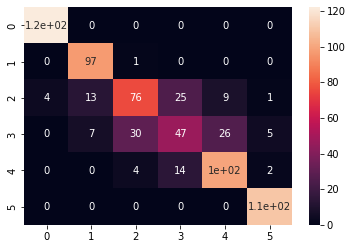

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Train Accuracy:', accuracy_score(y_train2, knn_train_pred)*100)
print("Accuracy score", accuracy_score(y_test2, knn_pred)*100)
print(confusion_matrix(y_test2, knn_pred))
confu1 = confusion_matrix(y_test2, knn_pred)
print(classification_report(y_test2,knn_pred, digits=4))
sns.heatmap(confu1, annot=True)

In [71]:
knn.fit(X_train2,y_train2)
knn_train_pred = knn.predict(X_train2)
knn_test_pred = knn.predict(X_test2)

precision score of knn

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(precision_score(y_test2, knn_test_pred, average = 'macro')*100,2))
print(" micro:", round(precision_score(y_test2,knn_test_pred, average = 'micro')*100,2))
print("weighted:", round(precision_score(y_test2,knn_test_pred, average = 'weighted')*100,2))

macro: 78.36
 micro: 79.65
weighted: 78.11


Recall score of knn

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(recall_score(y_test2, knn_test_pred, average = 'macro')*100,2))
print(" micro:", round(recall_score(y_test2,knn_test_pred, average = 'micro')*100,2))
print("weighted:", round(recall_score(y_test2,knn_test_pred, average = 'weighted')*100,2))

macro: 80.43
 micro: 79.65
weighted: 79.65


F1 score of KNN

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(f1_score(y_test2, knn_test_pred, average = 'macro')*100,2))
print(" micro:", round(f1_score(y_test2,knn_test_pred, average = 'micro')*100,2))
print("weighted:", round(f1_score(y_test2,knn_test_pred, average = 'weighted')*100,2))

macro: 78.98
 micro: 79.65
weighted: 78.49


In [75]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train1, y_train1)

SVC()

In [76]:
print("Train Accuracy of SVM",sv.score(X_train1, y_train1)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test1, y_test1)*100)
# print("Accuracy (Test) score of SVM", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of SVM 75.0
Accuracy (Test) score of SVM 25.0


In [77]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train2, y_train2)

SVC()

In [78]:
print("Train Accuracy of SVM",sv.score(X_train2, y_train2)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test2, y_test2)*100)
# print("Accuracy (Test) score of SVM", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of SVM 76.41747923438065
Accuracy (Test) score of SVM 72.72727272727273


In [79]:
sv_pred = sv.predict(X_test1)

In [80]:
cm5 = confusion_matrix(y_test1,sv_pred)
cm5

array([[2, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1, 2]])

In [81]:
sv_pred = sv.predict(X_test2)

In [82]:
cm6 = confusion_matrix(y_test2,sv_pred)
cm6

array([[122,   0,   0,   0,   0,   0],
       [  8,  73,  10,   6,   1,   0],
       [  5,  21,  76,  18,   8,   0],
       [  1,  11,  27,  51,  17,   8],
       [  0,   1,   5,  22,  76,  16],
       [  0,   0,   0,   0,   4, 106]])

In [83]:
sv.fit(X_train2,y_train2)
sv_train_pred = sv.predict(X_train2)
sv_test_pred = sv.predict(X_test2)

precision score for svc

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(precision_score(y_test2, sv_test_pred, average = 'macro')*100,2))
print(" micro:", round(precision_score(y_test2,sv_test_pred, average = 'micro')*100,2))
print("weighted:", round(precision_score(y_test2,sv_test_pred, average = 'weighted')*100,2))

macro: 71.47
 micro: 72.73
weighted: 71.51


Recall score for svc

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(recall_score(y_test2, sv_test_pred, average = 'macro')*100,2))
print(" micro:", round(recall_score(y_test2,sv_test_pred, average = 'micro')*100,2))
print("weighted:", round(recall_score(y_test2,sv_test_pred, average = 'weighted')*100,2))

macro: 72.98
 micro: 72.73
weighted: 72.73


F1 score for svc

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(f1_score(y_test2, sv_test_pred, average = 'macro')*100,2))
print(" micro:", round(f1_score(y_test2,sv_test_pred, average = 'micro')*100,2))
print("weighted:", round(f1_score(y_test2,sv_test_pred, average = 'weighted')*100,2))

macro: 71.94
 micro: 72.73
weighted: 71.83


In [87]:
nb = GaussianNB()
nb.fit(X_train1, y_train1)

GaussianNB()

In [88]:
nb_pred = nb.predict(X_test1)

In [89]:
print("Train Accuracy of Naive Bayes",nb.score(X_train1, y_train1)*100)
print("Accuracy (Test) score of Naive Bayes", nb.score(X_test1, y_test1)*100)
print("Accuracy (Test) score of Naive Bayes", accuracy_score(y_test1, nb_pred)*100)

Train Accuracy of Naive Bayes 56.25
Accuracy (Test) score of Naive Bayes 41.66666666666667
Accuracy (Test) score of Naive Bayes 41.66666666666667


In [90]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train2, y_train2)

GaussianNB()

In [91]:
print("Train Accuracy of Naive Bayes",nb.score(X_train2, y_train2)*100)
print("Accuracy (Test) score of Naive Bayes", nb.score(X_test2, y_test2)*100)
# print("Accuracy (Test) score of Naive Bayes", accuracy_score(y_test2, nb_pred)*100)

Train Accuracy of Naive Bayes 48.248465149873596
Accuracy (Test) score of Naive Bayes 46.75324675324675


In [92]:
nb_pred = nb.predict(X_test1)

In [93]:
cm7 = confusion_matrix(y_test1,nb_pred)
cm7

array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 2, 1],
       [0, 0, 0, 0, 3]])

In [94]:
nb_pred = nb.predict(X_test2)

In [95]:
cm8 = confusion_matrix(y_test2,nb_pred)
cm8

array([[ 95,   0,  16,  11,   0,   0],
       [ 44,   9,  20,  21,   2,   2],
       [ 22,  12,  53,  32,   3,   6],
       [ 16,   7,  12,  40,  12,  28],
       [  4,   3,   2,  22,  26,  63],
       [  0,   9,   0,   0,   0, 101]])

In [96]:
nb.fit(X_train2,y_train2)
nb_train_pred = nb.predict(X_train2)
nb_test_pred = nb.predict(X_test2)

Precision score for Naive baise

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(precision_score(y_test2, nb_test_pred, average = 'macro')*100,2))
print(" micro:", round(precision_score(y_test2,nb_test_pred, average = 'micro')*100,2))
print("weighted:", round(precision_score(y_test2,nb_test_pred, average = 'weighted')*100,2))

macro: 44.86
 micro: 46.75
weighted: 45.68


Recall score for NB

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(recall_score(y_test2, nb_test_pred, average = 'macro')*100,2))
print(" micro:", round(recall_score(y_test2,nb_test_pred, average = 'micro')*100,2))
print("weighted:", round(recall_score(y_test2,nb_test_pred, average = 'weighted')*100,2))

macro: 46.12
 micro: 46.75
weighted: 46.75


F1 score for NB

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("macro:", round(f1_score(y_test2, nb_test_pred, average = 'macro')*100,2))
print(" micro:", round(f1_score(y_test2,nb_test_pred, average = 'micro')*100,2))
print("weighted:", round(f1_score(y_test2,nb_test_pred, average = 'weighted')*100,2))

macro: 41.98
 micro: 46.75
weighted: 42.74
